In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

The purpose of this study is to validate and demonstrate two important theorems in statistics, the Law of Large Numbers (LLN) and the Central Limit Theorem (CLT), using simulated random numbers. This involves the utilization of two custom functions:

1. Demo_LLN(MEAN, population): In this function, "MEAN" represents the true mean of a random variable, and "population" refers to a pre-generated large sample that follows a certain pre-specified distribution. The data generation process involves using the true MEAN (as well as other real parameter values related to that distribution). 100 experiments are conducted subsequently, each involving the extraction of one smaller sample from the "population," starting from a sample size of 10 and increasing incrementally. The final sample size in the last experiment matches that of the "population." The sampling is done with replacement (replace=True). Following this, the sample means from each experiment are compared, and a line plot is generated to depict the trend. It is expected that a trend towards the true MEAN will be observed as the sample size increases.

2. Demo_CLT(MEAN,VARIANCE,population,sample_size,n_sample): In this function, assuming a random variable follows a pre-specified distribution, MEAN and VARIANCE represent the true mean and variance of the random variable. Population, like in Demo_LLN(), is a pre-generated large sample following this distribution. In this function, we perform “n_sample” experiments, each involving a samples with “sample_size" from the population. According to the Central Limit Theorem (CLT), regardless of the distribution of this random variable, the sample mean tends towards a Normal Distribution and the standardized sample mean tends towards a standard Normal Distribution. This function generates a density histogram for all obtained sample means from the experiments, along with a density histogram for a Normal Distribution for comparison (with parameters derived based on MEAN, VARIANCE, and sample size). Additionally, histograms of the standardized sample mean and the standard Normal Distribution are also plotted for comparison.

## Law of Large Number (LLN) and Central Limit Theorem (CLT)
###  LLN: The average of the results obtained from a large number of trials should be close to the expected value and tends to become closer to the expected value as more trials are performed.

### CLT: For independent and identically distributed random variables, the sampling distribution of the standardized sample mean tends towards the standard normal distribution even if the original variables themselves are not normally distributed.

In [2]:
##### MEAN and VARIANCE are theoretical values, derived from the parameters of the distribution

def Demo_LLN(MEAN,population):
    N      = list(range(10,100001,100))
    sample_mean = [np.nan]*len(N)
    for i in range(len(N)):
        sample_mean[i] = np.random.choice(population, size=N[i], replace=True).mean()
    
    plt.plot(N,sample_mean)
    plt.axhline(y=MEAN, color='r')
    plt.show()        

def Demo_CLT(MEAN,VARIANCE,population,sample_size,n_sample):
    ##### Calculate the sample means of all experiments, store the values in a list called sample_mean
    sample_mean = [np.nan]*n_sample
    for i in range(n_sample):
        sample_mean[i] = np.random.choice(population, size=sample_size, replace=True).mean()
    
    ##### Calculate the standarized sample means of all experiments, store the values in a list called std_sample_mean
    std_sample_mean = [(i-MEAN)*np.sqrt(sample_size)/np.sqrt(VARIANCE) for i in sample_mean]
    
    ##### Plotting histogram of sample mean, comparing with N(mu,sigma2/n)
    plt.hist(sample_mean, bins=30, density=True, label='Sample Mean')
    x = np.linspace(min(sample_mean), max(sample_mean), 100)
    plt.plot(x, stats.norm.pdf(x, MEAN, np.sqrt(VARIANCE/sample_size)), 'green', label='N(mu,sigma2/N)')
    x = np.linspace(-4, 4, 100)
    plt.plot(x, stats.norm.pdf(x, 0, 1), 'r', label='N(0,1)')
    plt.title('Sample Size: n='+str(sample_size))
    plt.legend()
    plt.show()
    
    ##### Plotting histogram of standardized sample mean with N(0,1)
    plt.hist(std_sample_mean, bins=30, density=True, label='Standardized Sample Mean')
    x = np.linspace(-4, 4, 100)
    plt.plot(x, stats.norm.pdf(x, 0, 1), 'r', label='N(0,1)')
    plt.title('Sample Size: n='+str(sample_size))
    plt.legend()
    plt.show()

### The following distributions are considered:
#### 1. Normal distribution: N(5,4)

#### 2. Bernoullie Distribution : Ber(0.6)

#### 3. Uniform Distribution: Unif[4,8]
For each distribution, three sample sizes are considered: 10, 100, 1000. In each case, 1000 experiments are performed.

### Normal Distribution 

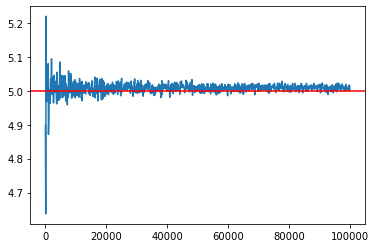

In [3]:
N_Gen  = 100000

##### Parameters
mu     = 5
sigma2 = 4

##### Theoretical mean and variance
theoretical_mean     = mu
theoretical_variance = sigma2

##### Generate simulated population data
data = np.random.normal(mu,np.sqrt(sigma2),N_Gen)

##### LLN
Demo_LLN(MEAN=theoretical_mean,population=data)

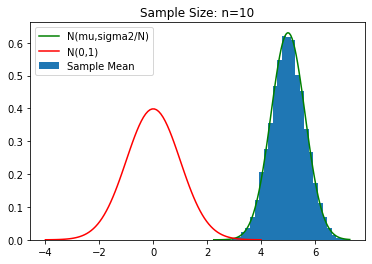

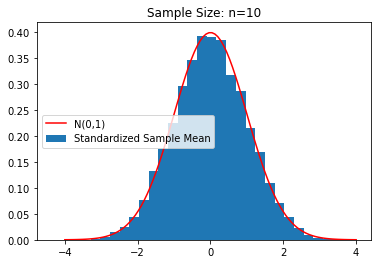

In [4]:
##### CLT
n_sample = 10000
sample_size = 10
Demo_CLT(MEAN=theoretical_mean,VARIANCE=theoretical_variance,
         population=data,
         sample_size=sample_size,n_sample=n_sample)

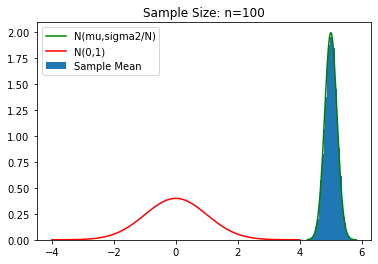

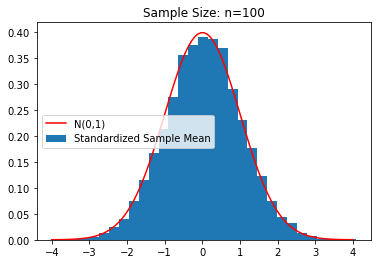

In [5]:
##### CLT
n_sample = 10000
sample_size = 100
Demo_CLT(MEAN=theoretical_mean,VARIANCE=theoretical_variance,
         population=data,
         sample_size=sample_size,n_sample=n_sample)

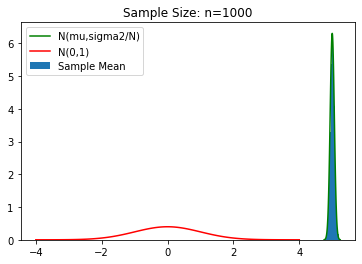

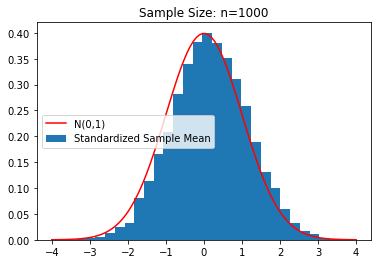

In [6]:
##### CLT
n_sample = 10000
sample_size = 1000
Demo_CLT(MEAN=theoretical_mean,VARIANCE=theoretical_variance,
         population=data,
         sample_size=sample_size,n_sample=n_sample)

### Bernoulli

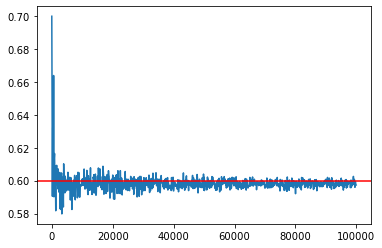

In [7]:
##### Parameters
p = 0.6

##### Theoretical mean and variance
theoretical_mean      = p
theoretical_variance  = p*(1-p)

##### Generate simulated population data
data = np.random.binomial(n=1, p=theoretical_mean, size=N_Gen)

##### LLN
Demo_LLN(MEAN=theoretical_mean,population=data)

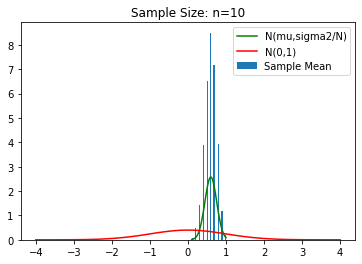

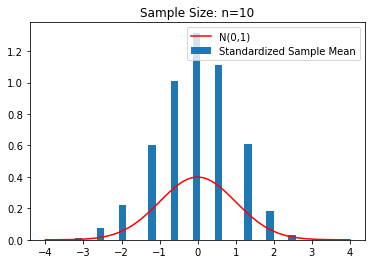

In [8]:
##### CLT
n_sample = 1000
sample_size = 10
Demo_CLT(MEAN=theoretical_mean,VARIANCE=theoretical_variance,
         population=data,
         sample_size=sample_size,n_sample=n_sample)

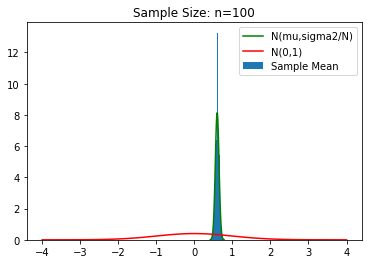

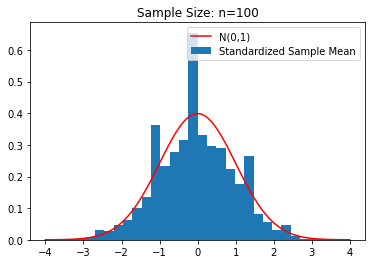

In [9]:
##### CLT
n_sample = 10000
sample_size = 100
Demo_CLT(MEAN=theoretical_mean,VARIANCE=theoretical_variance,
         population=data,
         sample_size=sample_size,n_sample=n_sample)

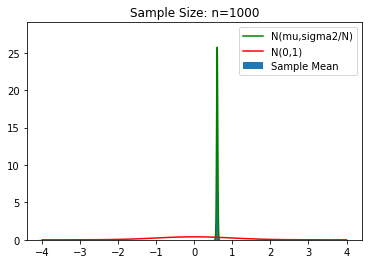

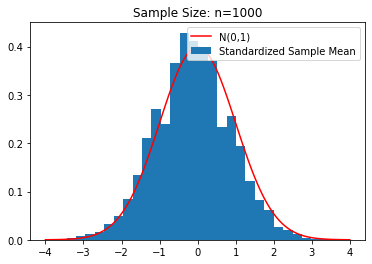

In [10]:
##### CLT
n_sample = 10000
sample_size = 1000
Demo_CLT(MEAN=theoretical_mean,VARIANCE=theoretical_variance,
         population=data,
         sample_size=sample_size,n_sample=n_sample)

### Uniform

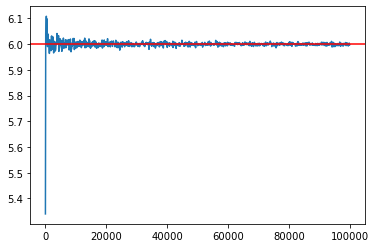

In [11]:
##### Parameters
a      = 4
b      = 8

##### Theoretical mean and variance
theoretical_mean      = (a+b)/2
theoretical_variance  = (b-a)**2/12

##### Generate simulated population data
data = np.random.uniform(low=a, high=b, size=N_Gen)

##### LLN
Demo_LLN(MEAN=theoretical_mean,population=data)

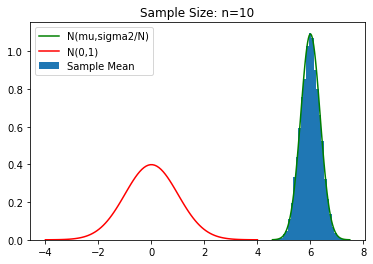

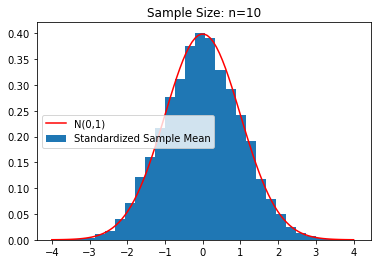

In [12]:
##### CLT
n_sample = 10000
sample_size = 10
Demo_CLT(MEAN=theoretical_mean,VARIANCE=theoretical_variance,
         population=data,
         sample_size=sample_size,n_sample=n_sample)

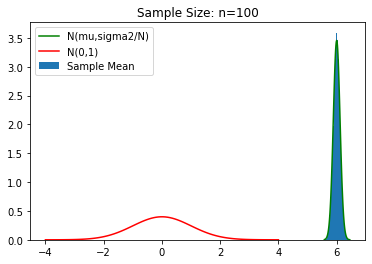

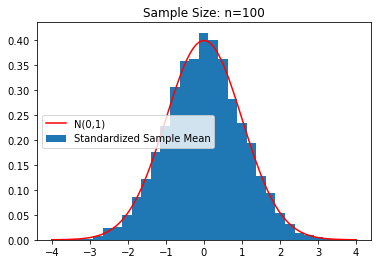

In [13]:
##### CLT
n_sample = 10000
sample_size = 100
Demo_CLT(MEAN=theoretical_mean,VARIANCE=theoretical_variance,
         population=data,
         sample_size=sample_size,n_sample=n_sample)

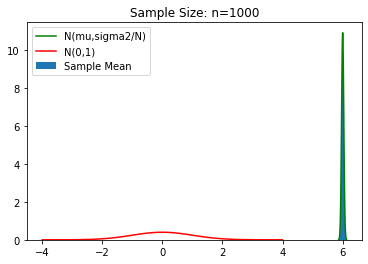

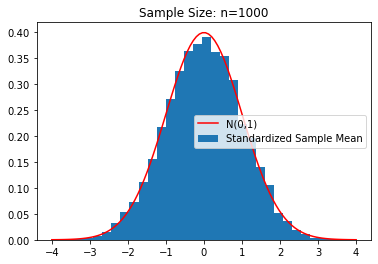

In [14]:
##### CLT
n_sample = 10000
sample_size = 1000
Demo_CLT(MEAN=theoretical_mean,VARIANCE=theoretical_variance,
         population=data,
         sample_size=sample_size,n_sample=n_sample)